# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import sqlalchemy

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
# YOUR CODE HERE
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
# prop = FontProperties

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)
conn = engine.connect()


## Explore Database

In [5]:
# Use the Inspector to explore the database and print the table names
# YOUR CODE HERE
inspector = inspect(engine)
inspector.get_table_names()


['emoji']

In [6]:
# Use Inspector to print the column names and types
# YOUR CODE HERE
columns = inspector.get_columns('emoji')
for c in columns:
        print(c['name'], c['type'])

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [7]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
# YOUR CODE HERE
emoji_table = pd.read_sql("SELECT * FROM emoji LIMIT 10", conn)
emoji_table

,id,emoji_char,emoji_id,name,score
0,1,😂,1F602,FACE WITH TEARS OF JOY,1814832150
1,2,❤️,2764,HEAVY BLACK HEART,840619939
2,3,😍,1F60D,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,4,♥️,2665,BLACK HEART SUIT,652715459
4,5,😭,1F62D,LOUDLY CRYING FACE,515991922
5,6,😊,1F60A,SMILING FACE WITH SMILING EYES,484540701
6,7,♻️,267B,BLACK UNIVERSAL RECYCLING SYMBOL,452489849
7,8,😒,1F612,UNAMUSED FACE,441690175
8,9,💕,1F495,TWO HEARTS,381679908
9,10,😘,1F618,FACE THROWING A KISS,377847645


In [14]:
emoji_df = pd.read_sql('select emoji_char, name, score from emoji order by score desc', conn)
emoji_df

,emoji_char,name,score
0,😂,FACE WITH TEARS OF JOY,1814832150
1,❤️,HEAVY BLACK HEART,840619939
2,😍,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,♥️,BLACK HEART SUIT,652715459
4,😭,LOUDLY CRYING FACE,515991922
...,...,...,...
840,🛂,PASSPORT CONTROL,103654
841,🔠,INPUT SYMBOL FOR LATIN CAPITAL LETTERS,103234
842,🔡,INPUT SYMBOL FOR LATIN SMALL LETTERS,101160
843,🚱,NON-POTABLE WATER SYMBOL,92412


In [15]:
emoji_df = emoji_df.sort_values(['score'], ascending=False)[:10]
emoji_df

,emoji_char,name,score
0,😂,FACE WITH TEARS OF JOY,1814832150
1,❤️,HEAVY BLACK HEART,840619939
2,😍,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,♥️,BLACK HEART SUIT,652715459
4,😭,LOUDLY CRYING FACE,515991922
5,😊,SMILING FACE WITH SMILING EYES,484540701
6,♻️,BLACK UNIVERSAL RECYCLING SYMBOL,452489849
7,😒,UNAMUSED FACE,441690175
8,💕,TWO HEARTS,381679908
9,😘,FACE THROWING A KISS,377847645


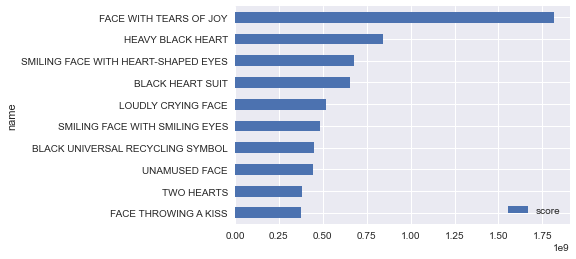

In [17]:
emoji_df.sort_values('score', inplace=True)
# emoji_df.set_index('emoji_char', inplace=True)
emoji_df.set_index('name', inplace=True)
# emoji_df[:10].plot(kind = 'barh')
emoji_df.plot(kind='barh')


## Reflect database and Query

In [8]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [9]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [11]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
# YOUR CODE HERE
results = pd.read_sql('SELECT emoji_char, emoji_id, score FROM emoji ORDER BY score DESC', conn)
results                      

,emoji_char,emoji_id,score
0,😂,1F602,1814832150
1,❤️,2764,840619939
2,😍,1F60D,680382416
3,♥️,2665,652715459
4,😭,1F62D,515991922
...,...,...,...
840,🛂,1F6C2,103654
841,🔠,1F520,103234
842,🔡,1F521,101160
843,🚱,1F6B1,92412


Unpack tuples using list comprehensions

In [12]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
# YOUR CODE HERE
emoji_id = [result for result in results.iloc[10:,1]]
scores = [int(result) for result in results.iloc[:10,2]]

## Plot using Matplotlib

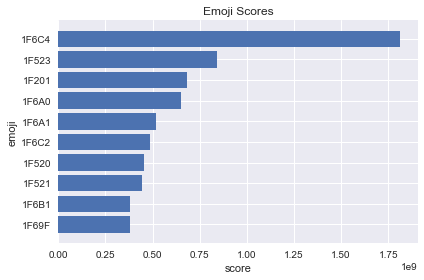

In [13]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)
# YOUR CODE HERE
fig, ax = plt.subplots()
ypos = range(1, len(scores)+1)
ax.barh(ypos, scores[::-1])
ax.set_xlabel('score')
ax.set_ylabel('emoji')
ax.set_yticks(ypos)
ax.set_yticklabels(emoji_id[::-1])
ax.set_title('Emoji Scores')
fig.tight_layout()
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [14]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df = pd.DataFrame(results[:10], columns=['emoji_char', 'emoji_id', 'score'])
df.set_index('emoji_char', inplace=True)
df.head(10)

,emoji_id,score
emoji_char,,
😂,1F602,1814832150
❤️,2764,840619939
😍,1F60D,680382416
♥️,2665,652715459
😭,1F62D,515991922
😊,1F60A,484540701
♻️,267B,452489849
😒,1F612,441690175
💕,1F495,381679908


Plot using Pandas

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128536 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128149 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128530 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9851 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128522 missing fro

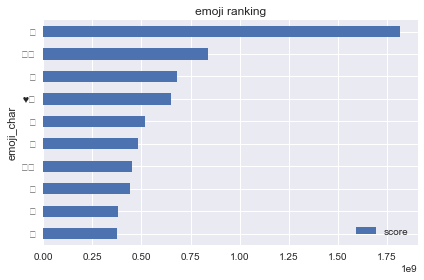

In [15]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
# YOUR CODE HERE
df.iloc[::-1].plot.barh(title="emoji ranking")
# plt.rcParams['font.family'] = prop.get_family()
plt.tight_layout()
plt.show()



In [16]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE
# stmt = session.query(Emoji).\
#       order_by(Emoji.score.desc()).statement
# df2 = pd.read_sql_query(stmt, session.bind)
# df2.head(10)

stmt = "SELECT * FROM emoji ORDER BY score DESC"
df2 = pd.read_sql_query(stmt,conn)
df2.head()

,id,emoji_char,emoji_id,name,score
0,1,😂,1F602,FACE WITH TEARS OF JOY,1814832150
1,2,❤️,2764,HEAVY BLACK HEART,840619939
2,3,😍,1F60D,SMILING FACE WITH HEART-SHAPED EYES,680382416
3,4,♥️,2665,BLACK HEART SUIT,652715459
4,5,😭,1F62D,LOUDLY CRYING FACE,515991922
